In [55]:
# Imports
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [4]:
# # Load, Clean and Check

# file_path = 'otog_data.csv'
# data = pd.read_csv(file_path)

# print("Original Data: \n")
# print(data.head())

# data_cleaned = data.drop(columns=['CID', 'TID'])
# data_cleaned.fillna(0, inplace=True)
# data_cleaned['Discount Amount (INR)'] = data_cleaned['Discount Amount (INR)'].astype(float)
# data_cleaned['Gender'] = data_cleaned['Gender'].str.lower()
# data_cleaned = data_cleaned[data_cleaned['Net Amount'] >= 0]
# data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]
# data_cleaned.rename(columns={'Discount Amount (INR)': 'Discount_Amount (PHP)'}, inplace=True)
 
# exchange_rate = 0.67
# data_cleaned['Discount_Amount (PHP)'] = data_cleaned['Discount_Amount (PHP)'] * exchange_rate
# data_cleaned['Gross Amount'] = data_cleaned['Gross Amount'] * exchange_rate
# data_cleaned['Net Amount'] = data_cleaned['Net Amount'] * exchange_rate

# print("\n---------------------------------------------------------------------------------")
# print("\nCleaned Data: \n")
# print(data_cleaned.head())

# data_cleaned.info()
# data_cleaned.describe() 
 
# data_cleaned.to_csv('cleaned_otog_data.csv', sep='\t')

In [56]:
# Converting to numerical values

path = "cleaned_otog_data.csv"

data = pd.read_csv(path, sep="\t")

# change to numerical data
# paired with mean values rounded up
data['Age_num'] = data['Age Group'].map({'under 18': 17.0, '18-25': 21.5, '25-45': 35.0, '45-60': 52.5, '60 and above': 61.0})
# print(data['Age_num'])
data['Gender_num'] = data['Gender'].map({'male': 0, 'female': 1, 'other': 2})
# print(data['Gender_num'])

age_group_stats = data['Age Group'].describe()
print(f"\nAge Group Stats:")
print(f"{age_group_stats}\n")

gender_stats = data['Gender'].describe()
print("Gender Stats:")
print(gender_stats)


Age Group Stats:
count     54387
unique        5
top       25-45
freq      21789
Name: Age Group, dtype: object

Gender Stats:
count     54387
unique        3
top       other
freq      18266
Name: Gender, dtype: object


Age Group Descriptive Statistics:
	Mean: 34.866833986062844
	Median: 35.0
	Mode: 35.0
	Standard Deviation: 12.863120757188723
	Variance: 165.45987561401938
	Min: 17.0
	Max: 61.0
	Range: 44.0
	Percentiles (25th, 50th, 75th): [21.5 35.  52.5]

Gender
Mode: other


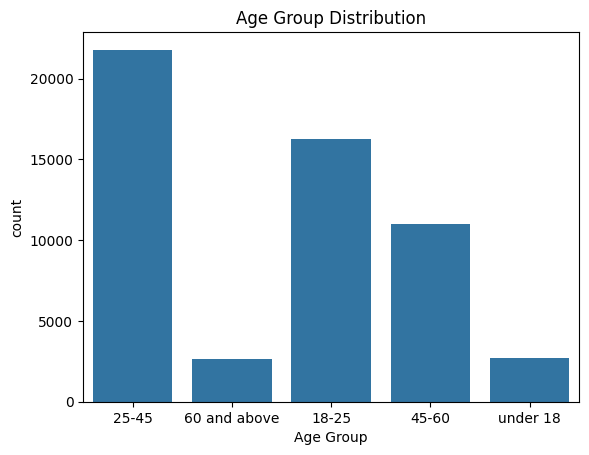


Scipy Descriptive Statistics for Age Group: DescribeResult(nobs=54387, minmax=(17.0, 61.0), mean=34.866833986062844, variance=165.45987561401938, skewness=0.4595911170367139, kurtosis=-0.9208191650798478)


In [57]:
# 4. Basic Descriptive Statistics

mean_age = data['Age_num'].mean()
median_age = data['Age_num'].median()
mode_age = data['Age_num'].mode()[0]
std_dev_age = data['Age_num'].std()
variance_age = data['Age_num'].var()
min_age = data['Age_num'].min()
max_age = data['Age_num'].max()
range_age = max_age - min_age
percentiles_age = np.percentile(data['Age_num'], [25, 50, 75])

print("Age Group Descriptive Statistics:")
print(f"\tMean: {mean_age}")
print(f"\tMedian: {median_age}")
print(f"\tMode: {mode_age}")
print(f"\tStandard Deviation: {std_dev_age}")
print(f"\tVariance: {variance_age}")
print(f"\tMin: {min_age}")
print(f"\tMax: {max_age}")
print(f"\tRange: {range_age}")
print(f"\tPercentiles (25th, 50th, 75th): {percentiles_age}")


print("\nGender")
gender_mode = data['Gender'].mode()[0]
print(f"Mode: {gender_mode}")

sb.countplot(x='Age Group', data=data)
plt.title('Age Group Distribution')
plt.show()


desc_stats = stats.describe(data['Age_num'])
print(f"\nScipy Descriptive Statistics for Age Group: {desc_stats}")

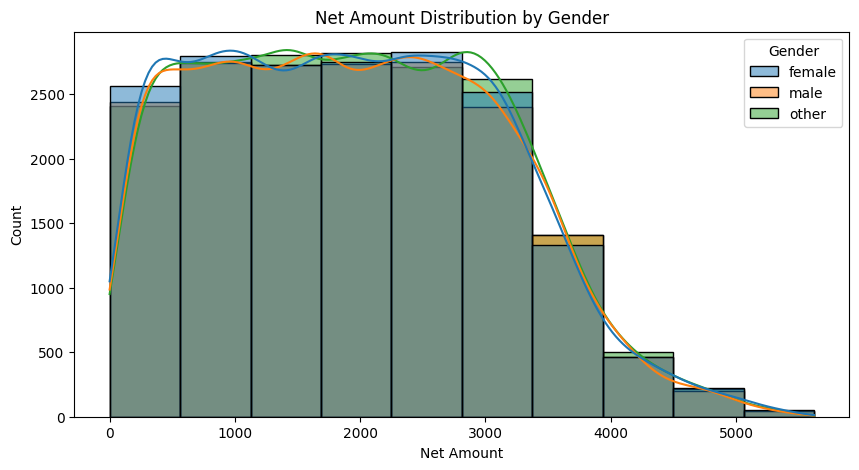

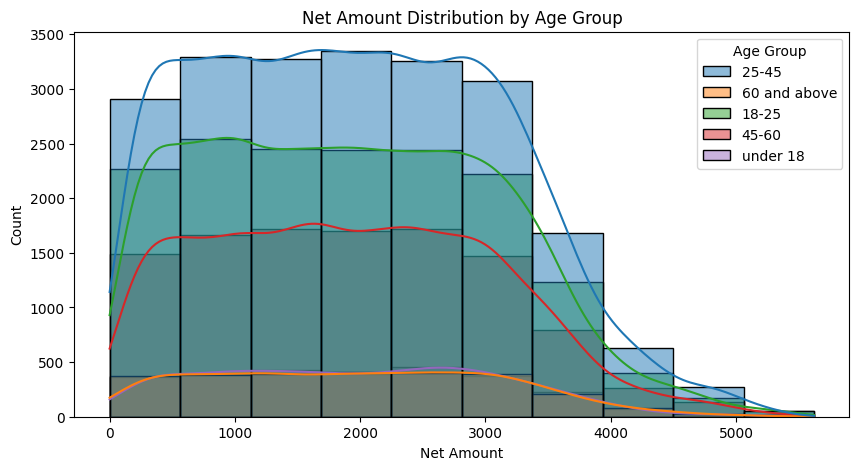

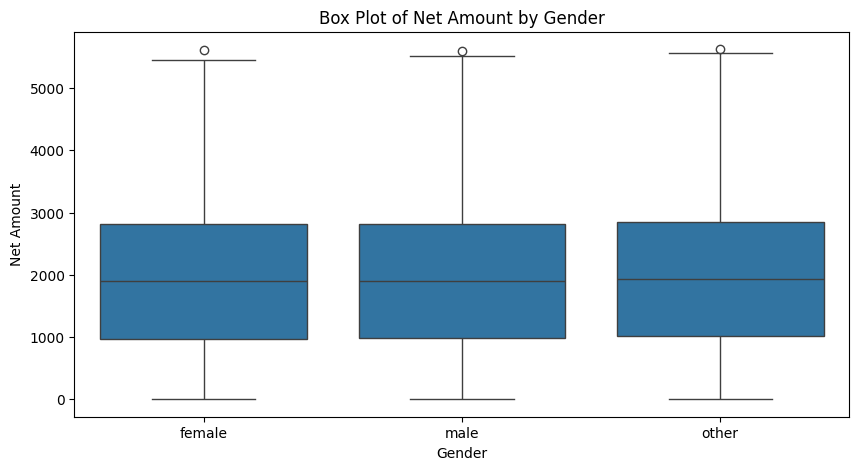

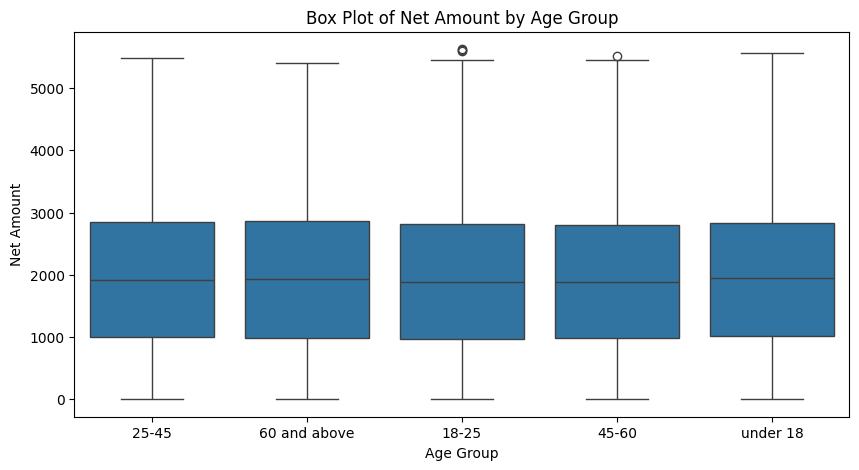

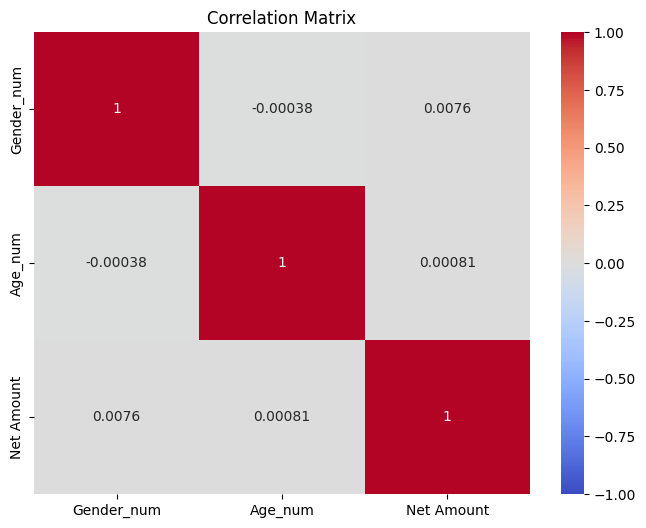

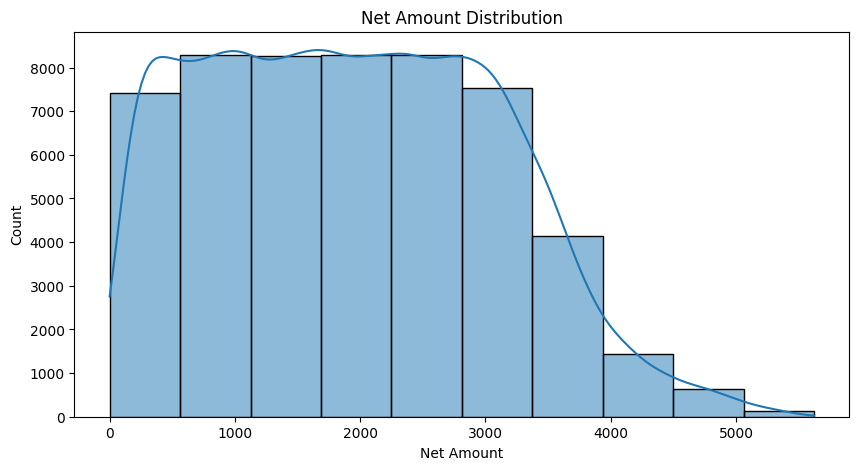

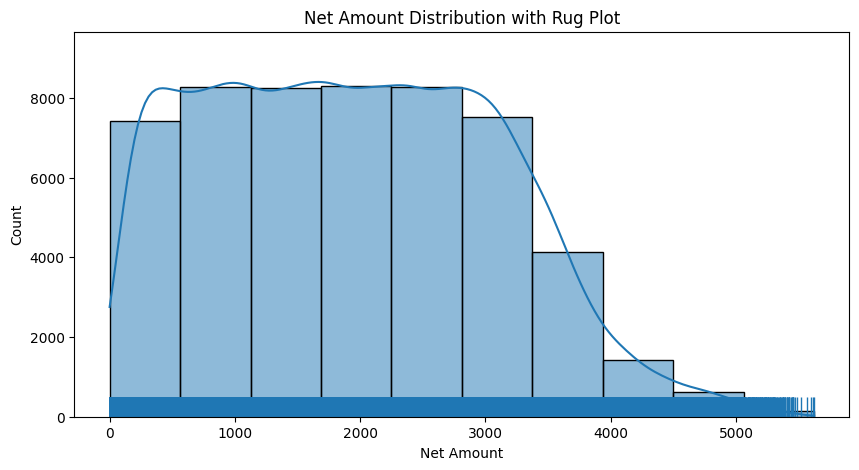

In [65]:
# 5. Visual Representation
    # - Plot **histograms** and box plots to visualize the distribution of the data.
    # - Generate correlation matrices or heatmaps to observe relationships between variables (optional but encouraged).

# Net Amount by Gender (uninteresting)
plt.figure(figsize=(10,5))
sb.histplot(data=data, x='Net Amount', hue='Gender', kde=True, bins=10)
plt.title('Net Amount Distribution by Gender')
plt.show()
# Net Amount by Age Group (significant)
plt.figure(figsize=(10,5))
sb.histplot(data=data, x='Net Amount', hue='Age Group', kde=True, bins=10)
plt.title('Net Amount Distribution by Age Group')
plt.show()

# Box Plot for Net Amount by Gender (uninteresting)
plt.figure(figsize=(10,5))
sb.boxplot(x='Gender', y='Net Amount', data=data)
plt.title('Box Plot of Net Amount by Gender')
plt.show()
# Box Plot for Net Amount by Age Group (uninteresting)
plt.figure(figsize=(10,5))
sb.boxplot(x='Age Group', y='Net Amount', data=data)
plt.title('Box Plot of Net Amount by Age Group')
plt.show()

# Corelation Matrix (likley irrelevant)
correlation_matrix = data[['Gender_num', 'Age_num', 'Net Amount']].corr()
plt.figure(figsize=(8,6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Plot Histogram for Net Amount (uninteresting)
plt.figure(figsize=(10,5))
sb.histplot(data=data, x='Net Amount', bins=10, kde=True)
plt.title('Net Amount Distribution')
plt.show()
# Plot Histogram with Rug Plot (uninteresting)
plt.figure(figsize=(10,5))
sb.histplot(data=data, x='Net Amount', bins=10, kde=True)
sb.rugplot(data=data, x='Net Amount', height=0.05)
plt.title('Net Amount Distribution with Rug Plot')
plt.show()
